<a href="https://colab.research.google.com/github/bhas10bc/Deep_learning-models/blob/main/image_classification_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dependencies

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load and preprocess the dataset

In [14]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [15]:
x_test.shape

(10000, 32, 32, 3)

# Data augmentation

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# Define the model

In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), padding = 'same', input_shape = x_train.shape[1:]))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(48, (3,3), padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(80, (3,3,), padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), padding = "same"))
model.add(layers.Activation('relu'))
model.add(layers.GlobalMaxPool2D())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(500))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(10))
model.add(layers.Activation("softmax"))

# compile the model

In [19]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

# Summary of the model

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 48)        13872     
                                                                 
 activation_7 (Activation)   (None, 32, 32, 48)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 48)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 48)        0         
                                                      

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# EarlyStopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model

In [24]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),steps_per_epoch=len(x_train) / 128, epochs=50, validation_data=(x_test, y_test), callbacks = [early_stopping])


Epoch 1/50
390/390 [==============================] - 38s 92ms/step - loss: 1.9719 - accuracy: 0.2571 - val_loss: 1.6382 - val_accuracy: 0.4084
Epoch 2/50
390/390 [==============================] - 37s 95ms/step - loss: 1.6708 - accuracy: 0.3865 - val_loss: 1.5019 - val_accuracy: 0.4543
Epoch 3/50
390/390 [==============================] - 35s 90ms/step - loss: 1.5262 - accuracy: 0.4475 - val_loss: 1.3661 - val_accuracy: 0.4975
Epoch 4/50
390/390 [==============================] - 36s 91ms/step - loss: 1.4361 - accuracy: 0.4818 - val_loss: 1.2811 - val_accuracy: 0.5265
Epoch 5/50
390/390 [==============================] - 36s 91ms/step - loss: 1.3797 - accuracy: 0.5024 - val_loss: 1.1624 - val_accuracy: 0.5813
Epoch 6/50
390/390 [==============================] - 36s 92ms/step - loss: 1.3377 - accuracy: 0.5192 - val_loss: 1.2354 - val_accuracy: 0.5528
Epoch 7/50
390/390 [==============================] - 36s 92ms/step - loss: 1.3026 - accuracy: 0.5342 - val_loss: 1.1592 - val_accuracy:

# Evaluate the model

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.7558 - accuracy: 0.7427 - 1s/epoch - 3ms/step

Test accuracy: 0.7426999807357788


# Plot Graphs

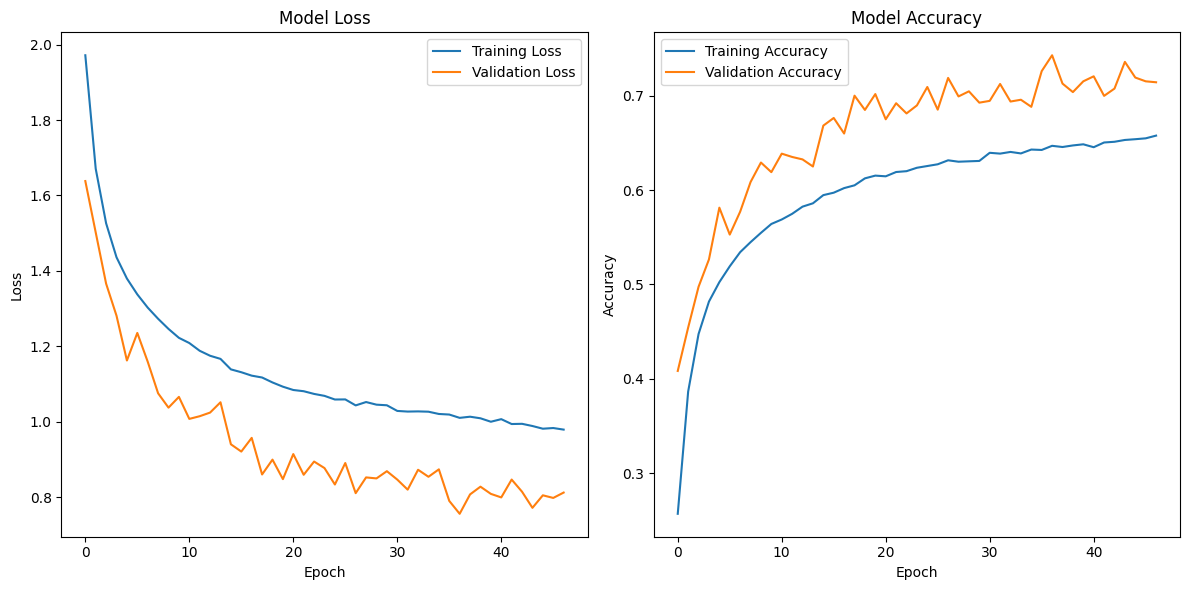

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()
